**Example 1:**
We will use K-means to perform color segmentation on an image.

In [31]:
import matplotlib.pyplot as plt
import PIL
import urllib.request
from PIL import Image

In [32]:
# Mount Google Drive so that we can access the picture
# from google.colab import drive
# drive.mount('/content/drive')

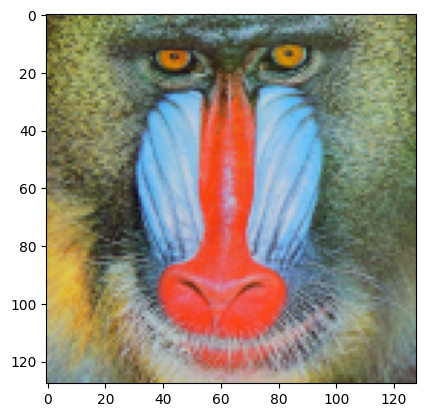

In [33]:
## If you wanted to take a picture directly from the internet
# # Retrieving the resource located at the URL
# # and storing it in the file name a.png
url = "https://github.com/jesusdfc/JII/raw/main/mandrill-small.tiff"
urllib.request.urlretrieve(url, "monkey.png")

# Opening the image and displaying it (to confirm its presence)
img = Image.open(r"monkey.png")
plt.imshow(img)

In [34]:
# from PIL import Image

# # downsize the image with an ANTIALIAS filter (gives the highest quality)
# img = img.resize((110,160),Image.ANTIALIAS)
# plt.imshow(img)

In [35]:
# Let's check its size
import numpy as np
rgb_pixels_big = np.array(img)
rgb_pixels_big.shape

(128, 128, 3)

In [36]:
width = rgb_pixels_big.shape[0]
height = rgb_pixels_big.shape[1]
print(width)
print(height)

128
128


Image of 128 x 128 pixels, with each pixel having 3 channels (R, G, B)

In [37]:
# Let's reshape the image to a vector of pixels (ponemos la imagen en un vector)
img_vector = np.array(img)
img_vector = img_vector.reshape((width*height, 3))
img_vector.shape

(16384, 3)

In [38]:
# We will now apply Kmeans with K=16 to cluster similar pixels together
from sklearn.cluster import KMeans
k = 16
kmeans = KMeans(n_clusters=k)

# Cluster assignmet for each pixel is stored in vector 'y_pred'
y_pred = kmeans.fit_predict(img_vector)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
# y_pred contains the cluster assignment to each pixel (it should range from 0 to 15)
y_pred

array([0, 0, 5, ..., 0, 0, 0], dtype=int32)

In [40]:
# We can check how many pixels are assigned to each cluster
np.unique(y_pred, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32),
 array([1947,  866,  889, 1228,  854, 1111, 1402, 1367,  329, 1135,  422,
        1523, 1473,  528,  539,  771]))

In [41]:
# Let's check the centroids (representative) for each cluster
# The clsuter representative is the average of all pixels assigned to that cluster,
# so it can be viewed as the "average pixel" (it should have 3 values for the R, G, B channles)
kmeans.cluster_centers_

array([[ 85.30405752,  91.58962506,  70.45814073],
       [178.91676301, 173.14797688, 167.33294798],
       [239.78065242,  74.90776153,  40.18110236],
       [150.78513072, 150.61683007,  96.7622549 ],
       [116.45486518, 182.75498242, 227.46189918],
       [ 59.11881188,  58.27362736,  46.41044104],
       [ 93.06518625, 111.47851003, 107.72277937],
       [151.01822157, 161.25291545, 139.39431487],
       [170.15151515, 111.1030303 ,  46.21212121],
       [157.52288732, 192.6875    , 221.6540493 ],
       [206.61374408, 119.26777251, 123.33412322],
       [119.51277014, 120.04518664,  79.17092338],
       [119.9755102 , 135.22789116, 122.96598639],
       [202.95454545, 169.72159091,  77.85795455],
       [101.81952118, 141.73480663, 174.51565378],
       [229.74319066,  90.88197147,  79.69130999]])

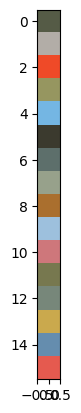

In [42]:
# Let's plot the centroids to understand better how the clusters look like
tmp = kmeans.cluster_centers_.reshape(16,1,3)
plt.imshow(np.uint8(tmp))

In [43]:
tmp.shape

(16, 1, 3)

In [44]:
# Let's plot some of the pixels assigned to a specific cluster
# cluster = 0
# tmp = np.unique(y_pred, return_counts=True)
# num_pixels_assigned_to_cluster = tmp[1][cluster]
# num_pixels_assigned_to_cluster

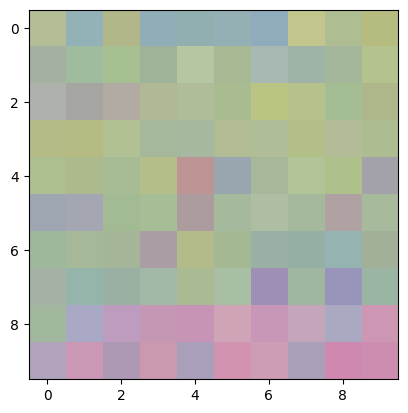

In [45]:
cluster = 1
pixels_in_cluster = img_vector[y_pred == cluster][0:100]
tmp1 = pixels_in_cluster.reshape(10, 10, 3)
plt.imshow(np.uint8(tmp1))


In [46]:
pixels_in_cluster[0:400].shape

(100, 3)

In [47]:
# Now we need to substitute the pixel in the original image by the centroid of the cluster they are assigned to
new_image_vector = kmeans.cluster_centers_[y_pred]
new_image_vector.shape

(16384, 3)

In [48]:
# Let's check the pixel value (R,G,B) of the first pixel
new_image_vector[0]

array([85.30405752, 91.58962506, 70.45814073])

Does it make sense?

In [49]:
# Let's chec the cluster assignment of teh first pixel
y_pred[0]

0

In [50]:
# The new pixel should have values equal to the centroid of that cluster
kmeans.cluster_centers_[10]

array([206.61374408, 119.26777251, 123.33412322])

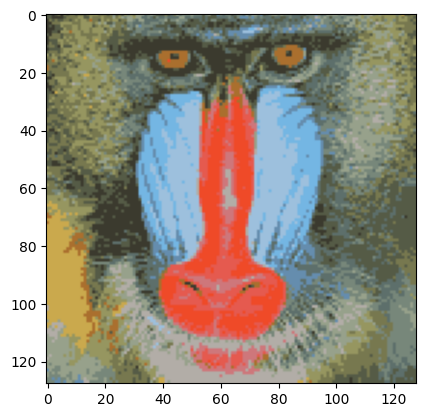

In [51]:
# Reshape back to (128,128,3) to plot it
new_image = new_image_vector.reshape(width,height,3)
plt.imshow(np.uint8(new_image))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

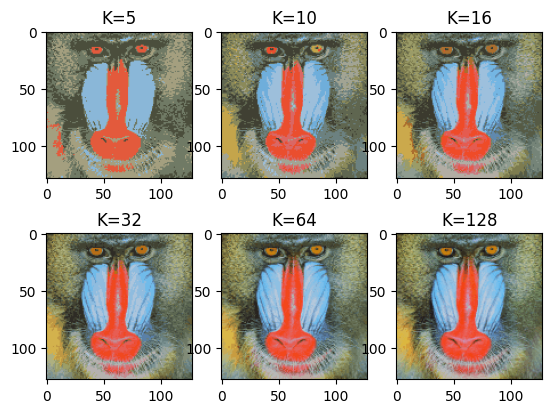

In [30]:
# Let's see how the reconstruction changes for different values of K
knumber = [5, 10, 16, 32, 64, 128]
f, axarr = plt.subplots(2,3)
row = 0
col = 0
for k in knumber:
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(img_vector)
  new_image_vector = kmeans.cluster_centers_[y_pred]
  new_image = new_image_vector.reshape(128,128,3)
  axarr[row,col].imshow(np.uint8(new_image))
  axarr[row,col].set_title(f"K=%d" % k)
  col += 1
  if col == 3:
    row = 1
    col = 0